<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Why Python for Finance?

## Zen of Python

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## The Python Ecosystem

In [2]:
100 * 2.5 + 50

300.0

In [3]:
# causes intentional error
# log(1)  

In [4]:
import math  

In [5]:
math.log(1)  

0.0

## Finance and Python Syntax

In [ ]:
import math
import numpy as np  

S0 = 100.  
K = 105.  # <2
T = 1.0  
r = 0.05  
sigma = 0.2  

I = 100000  # 模拟的路径数

np.random.seed(1000)   # 定义随机数种子

z = np.random.standard_normal(I)  

ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z)  

hT = np.maximum(ST - K, 0)  

C0 = math.exp(-r * T) * np.mean(hT)  

print('Value of the European call option: {:5.3f}.'.format(C0))  

In [10]:
%run bsm_mcs_euro.py

Value of the European call option 7.989.


## Time-to-Results

In [11]:
import numpy as np  
import pandas as pd  
from pylab import plt, mpl  

In [12]:
plt.style.use('seaborn')  
mpl.rcParams['font.family'] = 'serif'  
%matplotlib inline

In [13]:
data = pd.read_csv('../../source/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)    # 把第一列作为index,parse_dates=True解析前面的数据，日期

data = pd.DataFrame(data['.SPX'])  # 变成DataFrame形式,本来是serise一维

data.dropna(inplace=True)  # 去除空行，就地修改不留副本
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
.SPX    2138 non-null float64
dtypes: float64(1)
memory usage: 33.4 KB


In [15]:
data.head(15)  # 头的几行
# data.tail()  # 最后的几笔

,.SPX
Date,
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
2010-01-08,1144.98
2010-01-11,1146.98
2010-01-12,1136.22
2010-01-13,1145.68
2010-01-14,1148.46


In [16]:
data.pct_change().head(15)  # 间断时间的(pt-pt-1)/pt-1 ,报酬率

,.SPX
Date,
2010-01-04,NaN
2010-01-05,0.003116
2010-01-06,0.000546
2010-01-07,0.004001
2010-01-08,0.002882
2010-01-11,0.001747
2010-01-12,-0.009381
2010-01-13,0.008326
2010-01-14,0.002427


In [17]:
data.shift(1).head(15)  # 日期不变，把对应的值往后面移动一个，错位一格

,.SPX
Date,
2010-01-04,NaN
2010-01-05,1132.99
2010-01-06,1136.52
2010-01-07,1137.14
2010-01-08,1141.69
2010-01-11,1144.98
2010-01-12,1146.98
2010-01-13,1136.22
2010-01-14,1145.68


In [18]:
data['rets'] = np.log(data / data.shift(1))    # 连续时间的报销率，ln(data t /data t-1)，新增一栏

data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252) # 每次用252个数据，像stride，固定窗口大小为252，算成日波动度再乘根号t
# data['vola']前252的值为NaN, rolling参数min_periods=30,窗口从30扩展到252

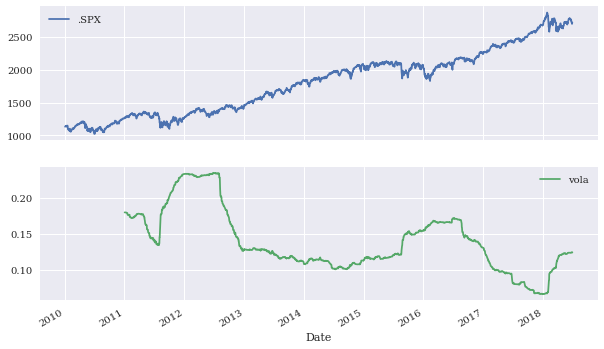

In [20]:
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6));  # 同过pandas绘图
# plt.savefig('../../images/ch01/spx_volatility.png')

## Idioms & Paradigms

In [21]:
import math


# 纯python下进行计算
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]  #计算时间，测量时间

2.7 s ± 75.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
import numpy as np

# 在numpy环境下，向量化计算
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2
# 节省时间

129 ms ± 6.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
import numexpr as ne

# 调用CPU，用1个核计算
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

64.8 ms ± 3.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
# 速度增加很多，调用4核进行并行计算
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

28 ms ± 318 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Data-Driven & AI-First Finance

### Data-Driven Finance 

**This sub-section requires a Eikon license. Therefore no code is provided.**

### AI-First Finance 
用机器学习SVM进行策略设计，核变换实现非线性转换，映射到高维度上面再进行分类<br>
最大化决策边界,支持向量到决策边界的距离最大化

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 
data = pd.read_csv('../../source/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O'])  
data['Returns'] = np.log(data / data.shift())  # 历史波动度
data.dropna(inplace=True)

In [3]:
lags = 6

In [4]:
cols = []  # 创造出来是栏名
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag)) # return 1 or -1 表示正负号，做多和做空
    cols.append(col)
data.dropna(inplace=True)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sign
  after removing the cwd from sys.path.


In [7]:
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']

In [8]:
data.head(15)  # lag_表示特征，是延后几期的波动率的符号

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0
2010-01-20,30.246398,-0.015536,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-21,29.724542,-0.017404,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-22,28.249972,-0.050881,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
2010-01-25,29.010685,0.026572,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2010-01-26,29.419971,0.014009,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2010-01-27,29.697685,0.009395,1.0,1.0,-1.0,-1.0,-1.0,-1.0


In [9]:
from sklearn.svm import SVC   # SVM模型，数据太大是会奔溃

In [10]:
model = SVC(gamma='scale')  

In [11]:
model.fit(data[cols], np.sign(data['Returns']))    # 用lag_1,lag_2,lag_3,lag_4,lag_4,lag_5,lag_6作为输入

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
data['Prediction'] = model.predict(data[cols])  

In [13]:
data['Strategy'] = data['Prediction'] * data['Returns']  

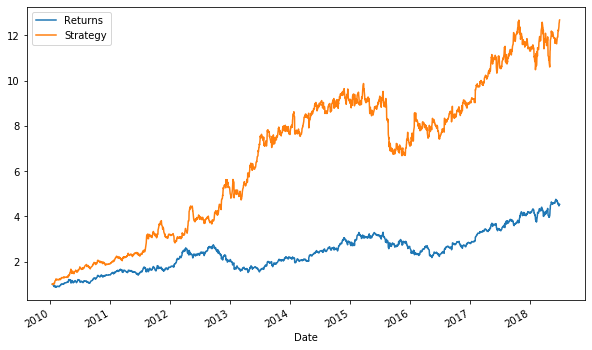

In [15]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));  
# plt.savefig('../../images/ch01/AAPL_trading_strategy.png');

In [22]:
data.tail(10)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction,Strategy
Date,,,,,,,,,,
2018-06-18,188.74,-0.000530,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.000530
2018-06-19,185.69,-0.016292,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,0.016292
2018-06-20,186.50,0.004353,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,0.004353
2018-06-21,185.46,-0.005592,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.005592
2018-06-22,184.92,-0.002916,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-0.002916
2018-06-25,182.17,-0.014983,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.014983
2018-06-26,184.43,0.012330,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,0.012330
2018-06-27,184.16,-0.001465,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.001465
2018-06-28,185.50,0.007250,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,0.007250


#### 计算下单次数

In [25]:
data['Number'] = np.where(data.Prediction != data.Prediction.shift(),1,0)
data

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction,Strategy,Number
Date,,,,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,0.014007,1
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-0.005808,0
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.016853,1
2010-01-20,30.246398,-0.015536,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-0.015536,1
2010-01-21,29.724542,-0.017404,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-0.017404,0
2010-01-22,28.249972,-0.050881,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.050881,1
2010-01-25,29.010685,0.026572,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.026572,1
2010-01-26,29.419971,0.014009,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.014009,1
2010-01-27,29.697685,0.009395,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.009395,1


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>